# Seoul Bike Sharing Demand


The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information.

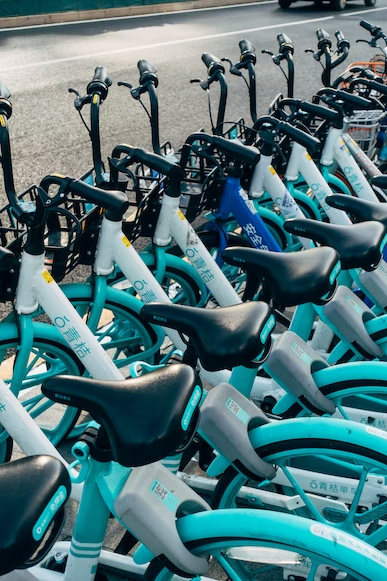

https://unsplash.com/photos/yeaUOU4JQxg

## Additional Information

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


## Attribute Information

Date : year-month-day 
Rented Bike count - Count of bikes rented at each hour 
Hour - Hour of he day 
Temperature-Temperature in Celsius 
Humidity - % 
Windspeed - m/s 
Visibility - 10m 
Dew point temperature - Celsius
Solar radiation - MJ/m2 
Rainfall - mm 
Snowfall - cm 
Seasons - Winter, Spring, Summer, Autumn 
Holiday - Holiday/No holiday 
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


Obs: This dataset is taken from: https://archive-beta.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

## Loading Packages

In [1]:
# Python Version
from platform import python_version
print('Python version: ', python_version())


Python version:  3.9.13


In [2]:
# Imports

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import missingno
%matplotlib inline
from pathlib import Path

# Statistics
from scipy import stats


# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
# Package versions
%reload_ext watermark
%watermark -a "Cézar Mendes" --iversions

Author: Cézar Mendes

pandas    : 1.4.4
seaborn   : 0.11.2
sys       : 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
numpy     : 1.21.5
scipy     : 1.9.1
missingno : 0.5.1
matplotlib: 3.5.2



## Loading Data

In [4]:
df = pd.read_csv('dataset/SeoulBikeData.csv', encoding= 'unicode_escape')

In [5]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Get information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
 # Generate descriptive statistics of the DataFrame
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Missing Values

In [8]:
# % Missing Values
def func_missing_values(df):

    totalCells = np.product(df.shape)

    missingCount = df.isnull().sum()

    totalMissing = missingCount.sum()

    print("The dataset has", round(((totalMissing/totalCells) * 100), 2), "%", "of missing values.")



In [9]:
func_missing_values(df)

The dataset has 0.0 % of missing values.


In [10]:
# Total of missing values by row
def func_missing_values_row(df):

    missing_rows = sum([True for idx,row in df.iterrows() if any(row.isna())])

    total_rows = df.shape[0]

    print(round(((missing_rows/total_rows) * 100), 2), "%", "of rows in the dataset contain at least one missing value.")



In [11]:
func_missing_values_row(df)

0.0 % of rows in the dataset contain at least one missing value.


In [12]:
# Missing values by Col
def func_missing_values_col(df):
    
    # Total of missing values
    miss_val = df.isnull().sum()

    # % missing values
    mis_val_percent = 100 * miss_val / len(df)

    # missing values types
    mis_val_dtype = df.dtypes

    # Table result
    mis_val_table = pd.concat([miss_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Missing Values', 2: 'Dtype'})

    # Just missing values columns
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,0] != 0].sort_values('% of Missing Values', ascending = False).round(2)

    # Print 
    print ("The dataset has " + str(df.shape[1]) + " columns.\n"
        "Found: " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    # DataFrame return
    return mis_val_table_ren_columns



In [13]:
func_missing_values_col(df)

The dataset has 14 columns.
Found: 0 columns that have missing values.


## EDA

In [14]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [15]:
df['Holiday'] = df['Holiday'].replace({'No Holiday': 'No', 'Holiday': 'Yes'})

In [16]:
# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes


#### Frequency Table

In [18]:
object_columns = df.select_dtypes('object').columns.tolist()[1:14]
print(object_columns)
print(type(object_columns))


['Holiday', 'Functioning Day']
<class 'list'>


In [19]:
for col in object_columns:
    print('\nFrequency of Categories for variable %s'%col)
    print(df[col].value_counts())


Frequency of Categories for variable Holiday
No     8328
Yes     432
Name: Holiday, dtype: int64

Frequency of Categories for variable Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64


In [20]:
# Pair Plot
#sns.pairplot(df.select_dtypes(['int64', 'float64']))
#plt.show()

# Business Problem

- 1.  What is the overall trend in bike rentals over time?

> Since the beginning of the operation, in general there has been an increase in rents despite large fluctuations.

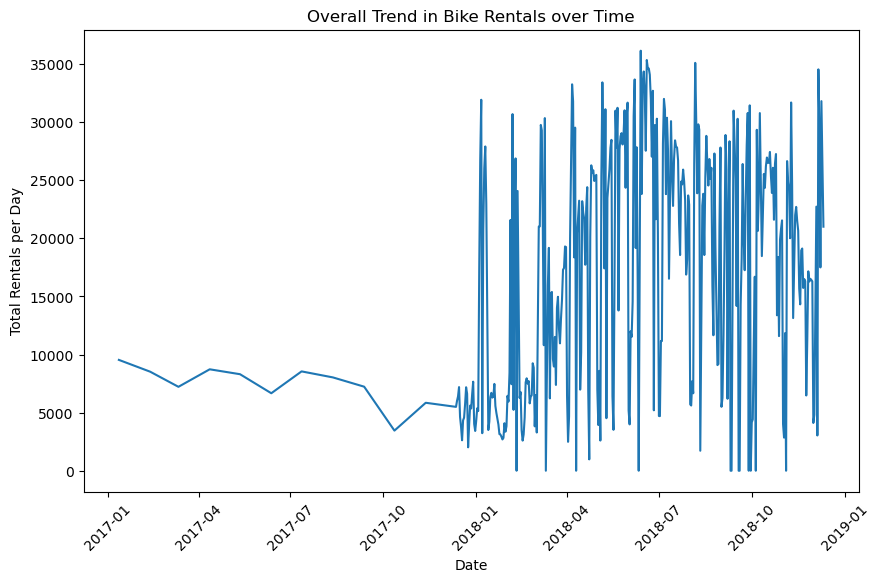

In [21]:
# Group the data by date and calculate the total rentals per day
daily_rentals = df.groupby(df['Date'].dt.date)['Rented Bike Count'].sum()

# Plot the trend line
plt.figure(figsize=(10, 6))
plt.plot(daily_rentals.index, daily_rentals.values)
plt.title('Overall Trend in Bike Rentals over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals per Day')
plt.xticks(rotation=45)
plt.show()

- 2. What time has the most rentals?
> The time with the most bike rentals is 18 hours (6 pm).

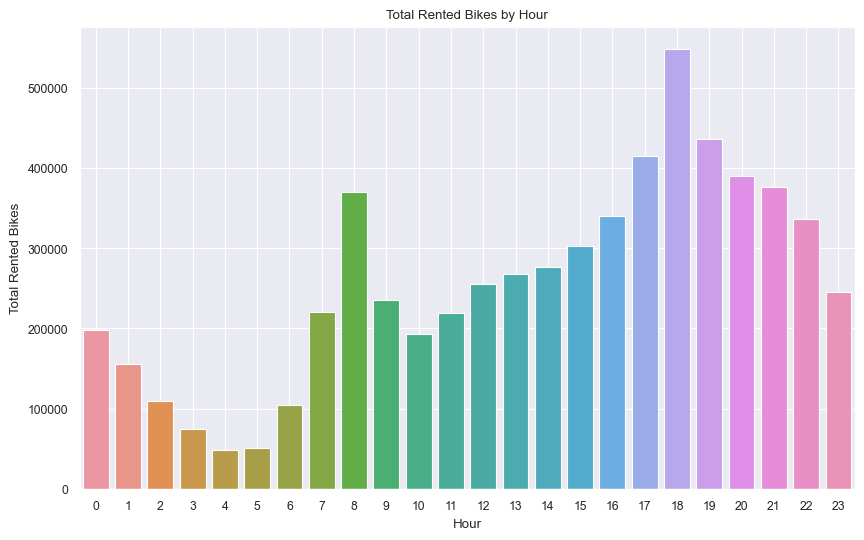

In [22]:
# Group the data by hour and calculate the total rentals
hourly_rentals = df.groupby('Hour')['Rented Bike Count'].sum().reset_index()

# Create a bar plot using Seaborn
sns.set_context('paper')
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Rented Bike Count', data=hourly_rentals)
plt.title('Total Rented Bikes by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Rented Bikes')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

- 3.  Which weather variables have the most significant impact on bike rentals?

> The most significant variable is Temperature (ºC) with a 0.54 of correlation follow by Dew point temperature(ºC)

In [23]:
print(df.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


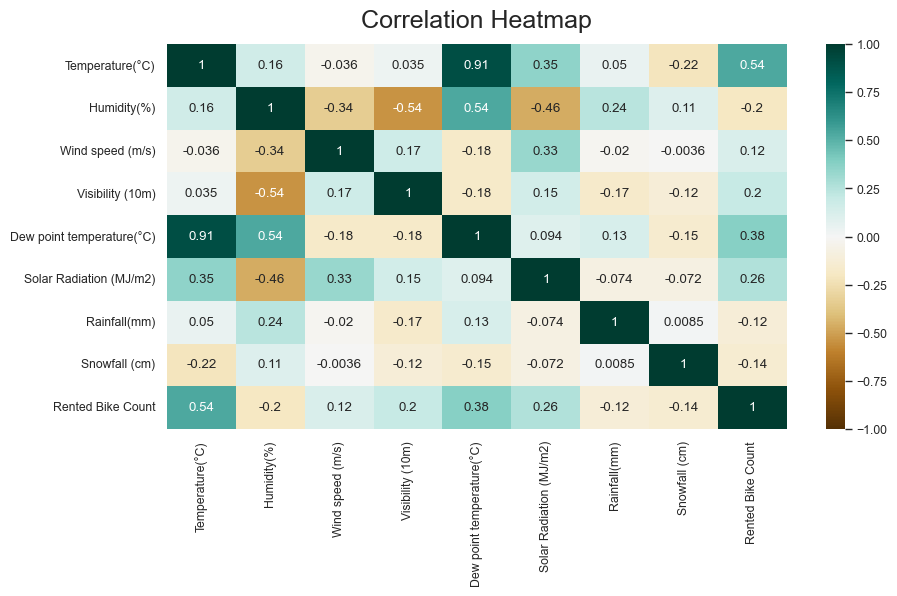

In [24]:
# Select the relevant columns for analysis
weather_variables = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
target_variable = 'Rented Bike Count'
data = df[weather_variables + [target_variable]]

# Calculate the correlation coefficients

# Heatmap
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

- 4.  Do holidays affect bike rentals? If so, how?

> To sum up holidays tend to affect bike rentals by reducing the demand for rental bikes. This could be due to various factors such as people being engaged in holiday activities, traveling out of the city, or engaging in different transportation options during holidays.

Average rentals on holidays: 499.75694444444446
Average rentals on non-holidays: 715.2280259365995
Percentage difference in rentals: -30.13%


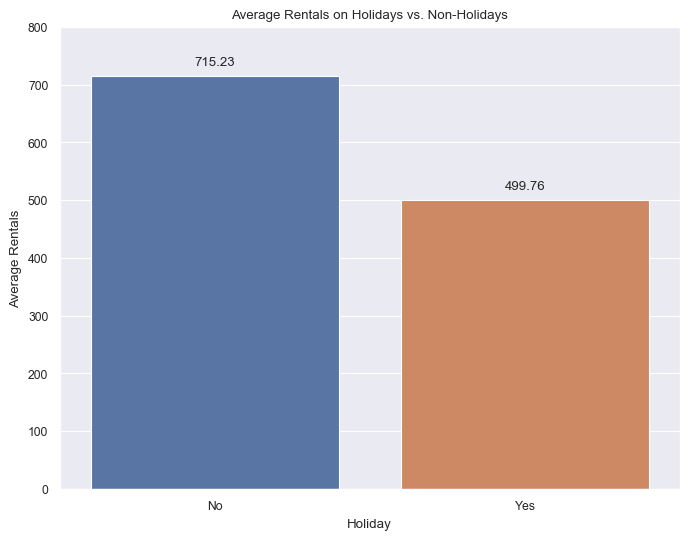

In [25]:
# Calculate the average rentals by holiday status
holiday_rentals = df.groupby('Holiday')['Rented Bike Count'].mean().reset_index()

# Calculate the percentage difference in rentals on holidays compared to non-holidays
percentage_difference = ((holiday_rentals.loc[holiday_rentals['Holiday'] == 'Yes', 'Rented Bike Count'].values[0] - holiday_rentals.loc[holiday_rentals['Holiday'] == 'No', 'Rented Bike Count'].values[0]) / holiday_rentals.loc[holiday_rentals['Holiday'] == 'No', 'Rented Bike Count'].values[0]) * 100

# Print the analysis results
print("Average rentals on holidays:", holiday_rentals[holiday_rentals['Holiday'] == 'Yes']['Rented Bike Count'].values[0])
print("Average rentals on non-holidays:", holiday_rentals[holiday_rentals['Holiday'] == 'No']['Rented Bike Count'].values[0])
print("Percentage difference in rentals: {:.2f}%".format(percentage_difference))

# Create a bar plot to visualize average rentals on holidays and non-holidays
sns.set_theme(style="darkgrid")
sns.set_context('paper')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Holiday', y='Rented Bike Count', data=holiday_rentals)
ax.set_ylim(top = 800)
plt.title('Average Rentals on Holidays vs. Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Rentals')

# Add bar labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()


In [26]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes


- 5.  Can we identify any seasonality patterns in bike rentals?
> Yes, it is possible to identify a pattern, for example, summer has the highest average of bike rentals, followed by autumn. Spring, which is usually warmer than autumn, has fewer rents, an insight worth investigating in this case is the rain factor.

In [27]:
# Calculate Rented bike by seasons
seasons_rentals = df.groupby('Seasons')['Rented Bike Count'].mean().reset_index()
print(seasons_rentals)

  Seasons  Rented Bike Count
0  Autumn         819.597985
1  Spring         730.031250
2  Summer        1034.073370
3  Winter         225.541204


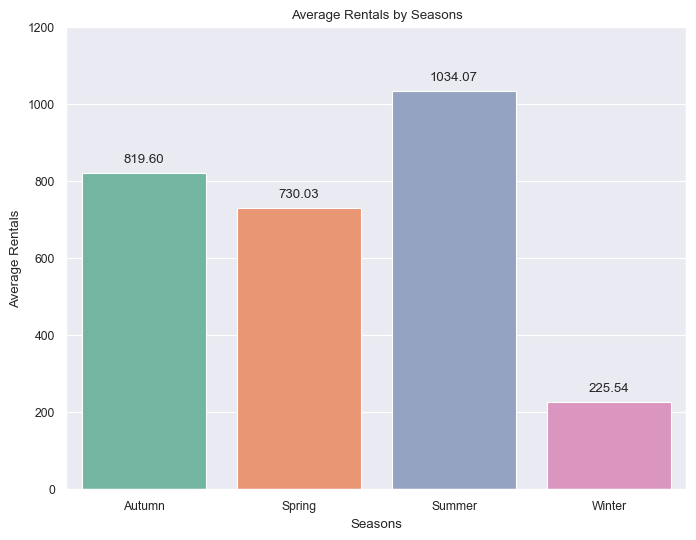

In [28]:
# Bar plot Average Retend Bike by Seasons
sns.set_theme(style="darkgrid")
sns.set_context('paper')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Seasons', y='Rented Bike Count', data=seasons_rentals, palette = 'Set2')
ax.set_ylim(top = 1200)
plt.title('Average Rentals by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Average Rentals')

# Add bar labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()

- 6. How does rainfall affect bike rentals? Is there a threshold beyond which rentals decrease significantly?

> It is possible to observe that the highest average of bike rentals is when the rainfall value is 0 mm, however there is a large concentration of rentals regardless of the season between rainfall 0 mm and 5 mm.

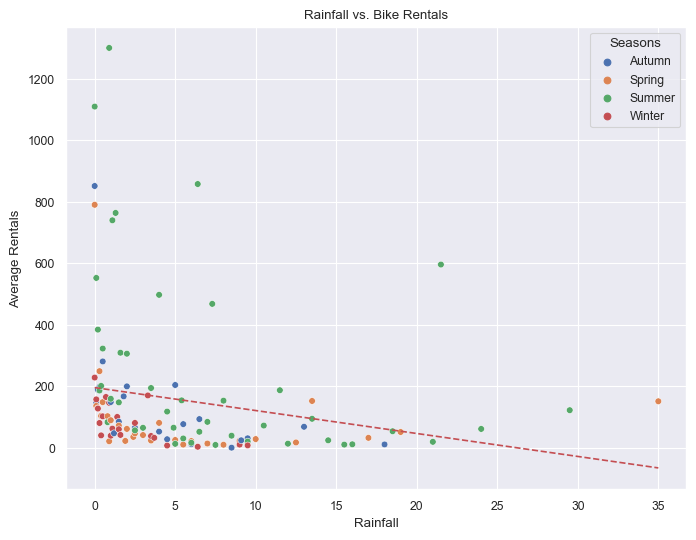

In [29]:
# Calculate the average rentals for different levels of rainfall
rainfall_rentals = df.groupby(['Rainfall(mm)', 'Seasons'])['Rented Bike Count'].mean().reset_index()

# Create a scatter plot to visualize the relationship between rainfall and rentals
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rainfall(mm)', y='Rented Bike Count', data=rainfall_rentals, hue = 'Seasons')
plt.title('Rainfall vs. Bike Rentals')
plt.xlabel('Rainfall')
plt.ylabel('Average Rentals')

# Add a trendline to the scatter plot
z = np.polyfit(rainfall_rentals['Rainfall(mm)'], rainfall_rentals['Rented Bike Count'], 1)
p = np.poly1d(z)
plt.plot(rainfall_rentals['Rainfall(mm)'], p(rainfall_rentals['Rainfall(mm)']), 'r--')

plt.show()

- 7.Are there specific days of the week when bike rentals are higher or lower?

> The graph below suggests that weekdays, especially Thursday and Wednesday, tend to have higher bike rental demand, possibly due to factors such as commuting to work or school. The lower rental counts on weekends could be attributed to a decrease in regular work or school-related travel.

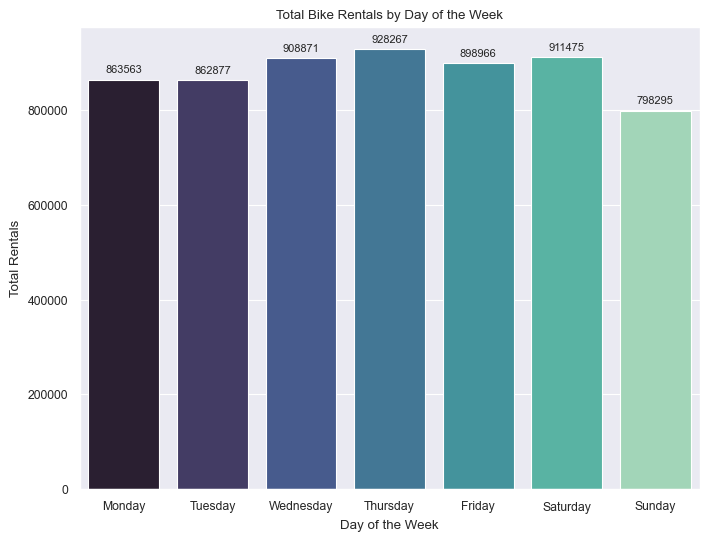

In [30]:
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.dayofweek

# Group the data by day of the week and calculate the sum of rentals
daily_rentals = df.groupby('DayOfWeek')['Rented Bike Count'].sum().reset_index()

# Define the names for the days of the week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot to visualize the sum of rentals across different days
plt.figure(figsize=(8, 6))
sns.barplot(x='DayOfWeek', y='Rented Bike Count', data=daily_rentals, palette = 'mako')

plt.title('Total Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rentals')

# Set the tick labels to display the day names
plt.xticks(range(7), day_names)

# Add annotations to the bar plot
for index, row in daily_rentals.iterrows():
    plt.annotate(row['Rented Bike Count'], 
                 xy=(row['DayOfWeek'], row['Rented Bike Count']),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center',
                 fontsize=8)

plt.show()


- 8.  Can we identify any outliers or anomalies in the bike rental data?
> It is possible to identify 5 columns with outliers. These columns are solar radiation, rainfall, snowfall, wind speed, and rented bike count. Notice that of 5 columns, 4 are related to natural or climate aspects.

In [42]:
num_list = df.select_dtypes(['float64', 'int64']).drop(columns = ['DayOfWeek']).columns.tolist()
num_list

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [43]:
# Describe
def count_outliers(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   out = ((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).sum()
   return out

# Skew
def calc_skew(df):
    return [df[col].skew() for col in df]


# Summary Table
def getOverview(df):
    min = df.min()
    Q1 = df.quantile(0.25)
    mean = np.mean(df)
    median = df.quantile(0.5)
    Q3 = df.quantile(0.75)
    max = df.max()
    IQR = Q3 - Q1
    skew = calc_skew(df)
    outliers = count_outliers(df)
    cut_off = IQR * 1.5
    lower, upper = Q1 - cut_off, Q3 + cut_off
        
    

    new_columns = ['Columns name', 'Min', 'Q1','Mean', 'Median', 'Q3', 'Max', 'IQR', 'Lower fence', 'Upper fence', 'Skew', 'Num_Outliers']
        
    data = zip([column for column in df], min, Q1, mean,  median, Q3, max, IQR, lower, upper, skew, outliers)

    new_df = pd.DataFrame(data = data, columns = new_columns)
        
    new_df.set_index('Columns name', inplace = True)
    \
    return new_df.sort_values('Num_Outliers', ascending = False).transpose()

getOverview(df[num_list]).round(3)

Columns name,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Wind speed (m/s),Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Dew point temperature(°C)
Min,0.000,0.000,0.000,0.000,0.000,0.00,-17.800,0.000,27.000,-30.600
Q1,0.000,0.000,0.000,0.900,191.000,5.75,3.500,42.000,940.000,-4.700
Mean,0.569,0.149,0.075,1.725,704.602,11.50,12.883,58.226,1436.826,4.074
Median,0.010,0.000,0.000,1.500,504.500,11.50,13.700,57.000,1698.000,5.100
Q3,0.930,0.000,0.000,2.300,1065.250,17.25,22.500,74.000,2000.000,14.800
Max,3.520,35.000,8.800,7.400,3556.000,23.00,39.400,98.000,2000.000,27.200
IQR,0.930,0.000,0.000,1.400,874.250,11.50,19.000,32.000,1060.000,19.500
Lower fence,-1.395,0.000,0.000,-1.200,-1120.375,-11.50,-25.000,-6.000,-650.000,-33.950
Upper fence,2.325,0.000,0.000,4.400,2376.625,34.50,51.000,122.000,3590.000,44.050
Skew,1.504,14.533,8.441,0.891,1.153,0.00,-0.198,0.060,-0.702,-0.367


- 9. Are there certain temperature ranges where bike rentals are the highest?

> The rentals increase as soon as the temperature also increases, having your maximum rentals between 20 and 30 degrees Celsius.

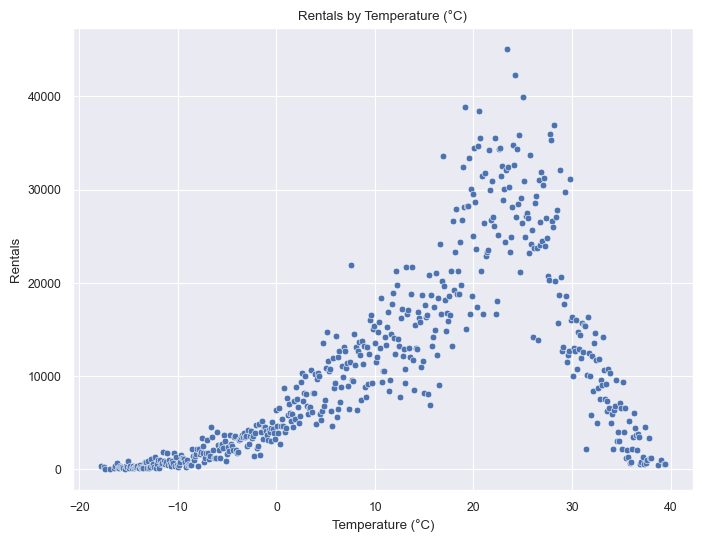

In [49]:
# Temperature rentals
temperature_rentals = df.groupby('Temperature(°C)')['Rented Bike Count'].sum().reset_index()

# Plot
sns.set_theme(style="darkgrid")
sns.set_context('paper')
plt.figure(figsize=(8, 6))

ax = sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=temperature_rentals, palette = 'Paired')
# ax.set_ylim(top = 1200)
plt.title('Rentals by Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rentals')

# Add bar labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()

- 10. How does the wind speed affect bike rentals? Is there an optimal range for maximum rentals?
> Based on the plot below, it appears that there is an optimal range for maximum rentals between 1 m/s and 2 m/s. Within this range, bike rentals tend to be at their highest. However, it's worth considering other factors such as temperature, humidity, and seasonality, as they may interact with wind speed and have additional influence on bike rental patterns.

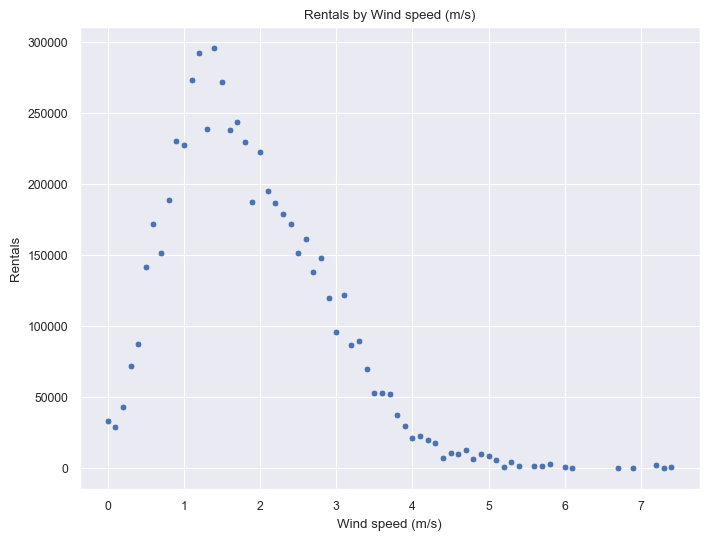

In [73]:
# Wind rentals
wind_rentals = df.groupby('Wind speed (m/s)')['Rented Bike Count'].sum().reset_index()

# Plot
sns.set_theme(style="darkgrid")
sns.set_context('paper')
plt.figure(figsize=(8, 6))

ax = sns.scatterplot(x='Wind speed (m/s)', y='Rented Bike Count', data=wind_rentals, palette = 'Paired')
plt.title('Rentals by Wind speed (m/s)')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rentals')

# Add bar labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()

# Conclusion

Upon analyzing the dataset, it becomes evident that weather conditions play a crucial role in influencing bike rentals. Despite the presence of variables with significant variability, such as wind speed, the focus on weather-related factors highlights their impact on bike rentals.

One notable finding is that there exists an optimal range for maximum rentals, particularly between wind speeds of 1 m/s and 2 m/s. Within this range, bike rentals peak, suggesting that moderate wind speeds are favorable for rental demand. However, as wind speeds exceed 2 m/s, the rented bike count begins to decline. This downward trend could be attributed to factors such as discomfort or safety concerns associated with higher wind speeds.

Furthermore, the analysis reveals insights regarding the influence of holidays on bike rentals. The percentage difference in rentals between holidays and non-holidays is calculated to be approximately -30.13%. This negative percentage indicates that bike rentals are lower on holidays compared to non-holidays by roughly 30.13%. This finding suggests that holidays have a dampening effect on bike rental demand, possibly due to altered routines, reduced commuting needs, or alternative modes of transportation.

Considering these conclusions, it becomes apparent that weather conditions and holidays are important factors to consider when predicting and managing bike rental demand. Understanding the relationship between these variables and rental patterns can help businesses optimize their operations, allocate resources effectively, and tailor marketing strategies to target specific weather conditions or non-holiday periods for increased rental activity.

In [81]:
# Save the DataFrame to a CSV file
# df.to_csv('SeoulBikeData_ML.csv', index=False)